<a href="https://colab.research.google.com/github/yashsuman15/hand-annotation-model/blob/main/Hand_landmarks_model_POC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 20.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible.


In [2]:
# !wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task


In [5]:
!pip install --upgrade numpy pandas tensorflow mediapipe opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 77.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:


In [37]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
import cv2

In [45]:
# Initialize MediaPipe Hands module
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

Processing: hand-sample-1.jpg


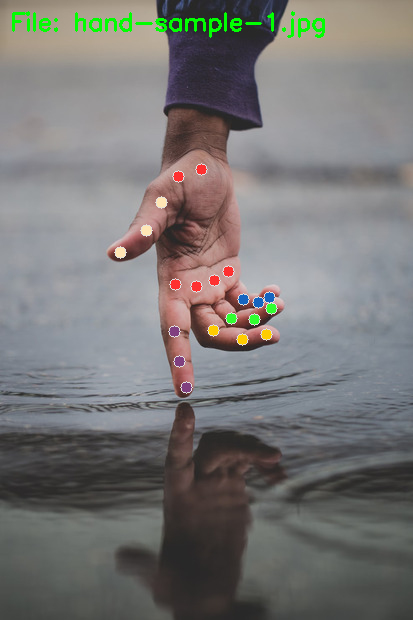

Processing: hand-sample-2.jpg


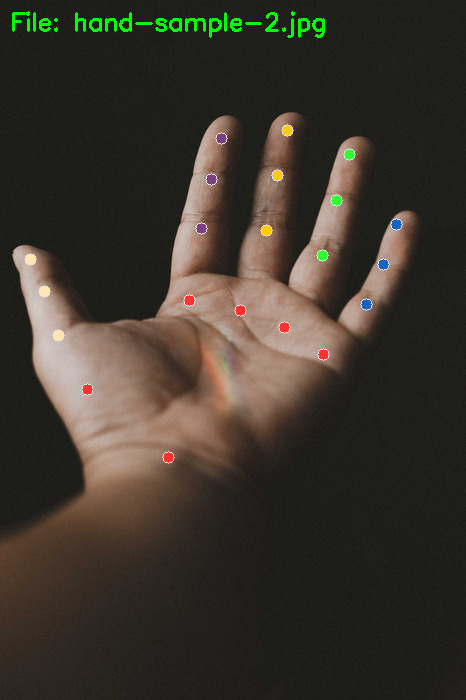

Processing: hand-sample-4.jpg


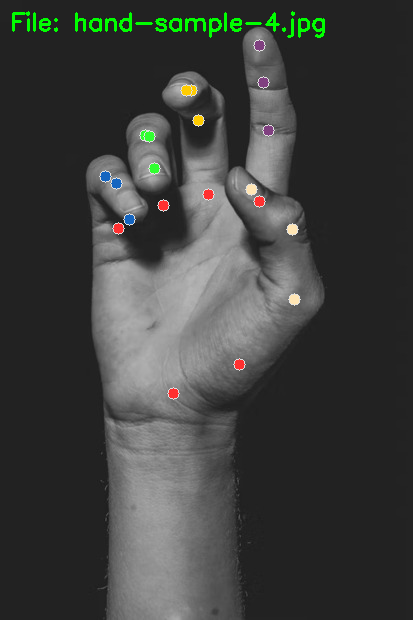

Processing: hand-sample-3.jpg


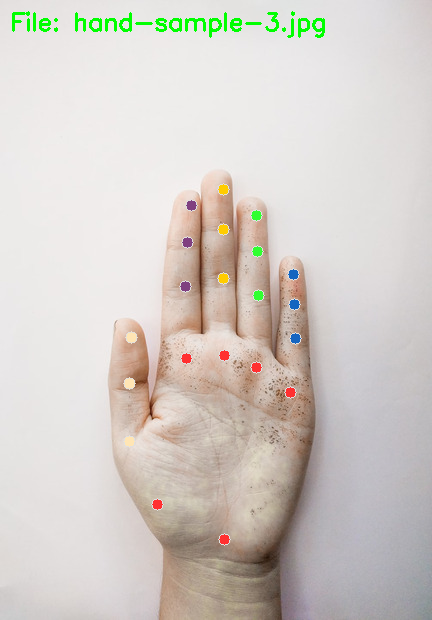

In [56]:
import cv2
import mediapipe as mp
import os
from google.colab.patches import cv2_imshow

# Set up Hands for static images
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:

    # Set folder path
    folder_path = '/content/sample'  # Change this to your folder path

    # Get all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'))]

    # Process each image in the folder
    for image_file in image_files:
        # Construct full file path
        image_path = os.path.join(folder_path, image_file)

        # Read image file
        image = cv2.imread(image_path)

        # Skip if image couldn't be loaded
        if image is None:
            print(f"Could not read image: {image_path}")
            continue

        # Convert to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Process the image
        results = hands.process(image_rgb)

        # Draw hand landmarks if detected
        if results.multi_hand_landmarks:
            for landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    image,
                    landmarks,
                    landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style(),
                )

        # Add filename as caption
        caption = f"File: {image_file}"
        cv2.putText(image, caption, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

        # Display the output
        print(f"Processing: {image_file}")
        cv2_imshow(image)

Hand 1:
    Landmark 0: x=201.07, y=169.47, z=0.00
    Landmark 1: x=178.64, y=176.40, z=-59.74
    Landmark 2: x=161.37, y=202.74, z=-84.00
    Landmark 3: x=146.97, y=230.61, z=-99.44
    Landmark 4: x=120.83, y=252.09, z=-113.76
    Landmark 5: x=175.08, y=284.04, z=-45.08
    Landmark 6: x=174.43, y=331.92, z=-57.58
    Landmark 7: x=179.70, y=361.18, z=-71.32
    Landmark 8: x=186.02, y=387.56, z=-83.70
    Landmark 9: x=196.38, y=286.36, z=-22.91
    Landmark 10: x=213.39, y=330.78, z=-46.31
    Landmark 11: x=242.24, y=339.24, z=-70.62
    Landmark 12: x=266.62, y=334.58, z=-85.58
    Landmark 13: x=214.64, y=280.87, z=-4.86
    Landmark 14: x=231.08, y=318.67, z=-27.57
    Landmark 15: x=254.33, y=319.19, z=-52.60
    Landmark 16: x=271.16, y=308.05, z=-66.72
    Landmark 17: x=228.57, y=271.58, z=8.96
    Landmark 18: x=243.99, y=299.92, z=-9.65
    Landmark 19: x=258.71, y=302.95, z=-27.97
    Landmark 20: x=269.60, y=297.12, z=-39.91


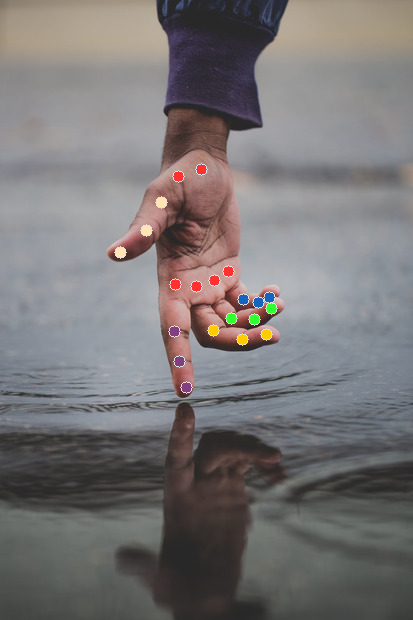

In [55]:
from google.colab.patches import cv2_imshow
import mediapipe as mp
import cv2

# Initialize MediaPipe drawing utilities and hands model
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# Set up Hands for static images
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:

    # Read an image file
    image = cv2.imread('/content/sample/hand-sample.jpg')

    # Convert to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image
    results = hands.process(image_rgb)

    # Draw hand landmarks if detected
    if results.multi_hand_landmarks:
        for hand_no, landmarks in enumerate(results.multi_hand_landmarks):
            print(f"Hand {hand_no+1}:")

            # Draw landmarks on the image
            mp_drawing.draw_landmarks(
                image,
                landmarks,
                landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style(),
            )

            # Print each landmark coordinate
            for landmark_id, landmark in enumerate(landmarks.landmark):
                # Get the coordinates relative to image dimensions
                h, w, c = image.shape
                x, y, z = landmark.x * w, landmark.y * h, landmark.z * w

                # Print coordinates
                print(f"    Landmark {landmark_id}: x={x:.2f}, y={y:.2f}, z={z:.2f}")

    # Display the output
    cv2_imshow(image)

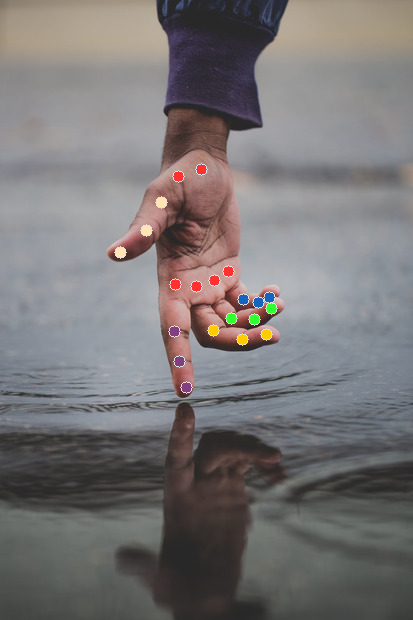

In [54]:
from google.colab.patches import cv2_imshow
# Set up Hands for static images
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:

    # Read an image file
    image = cv2.imread('/content/sample/hand-sample.jpg')

    # Convert to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image
    results = hands.process(image_rgb)

    # Draw hand landmarks if detected
    if results.multi_hand_landmarks:
        for landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                image,
                landmarks,
                landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style()
                )

    # Display the output
    cv2_imshow(image)


Processing: hand-sample-1.jpg - Saved landmarks to /content/hand_landmarks/hand-sample-1.json


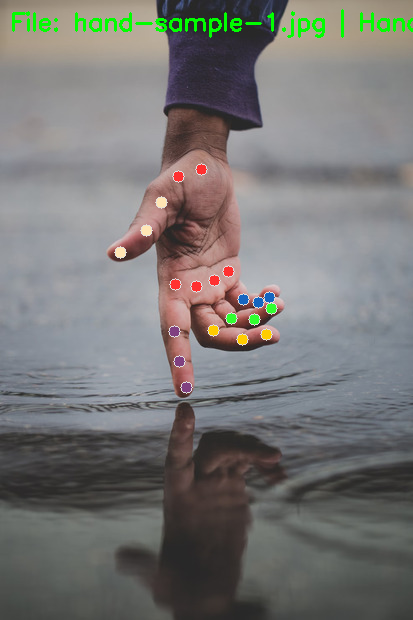

Processing: hand-sample-2.jpg - Saved landmarks to /content/hand_landmarks/hand-sample-2.json


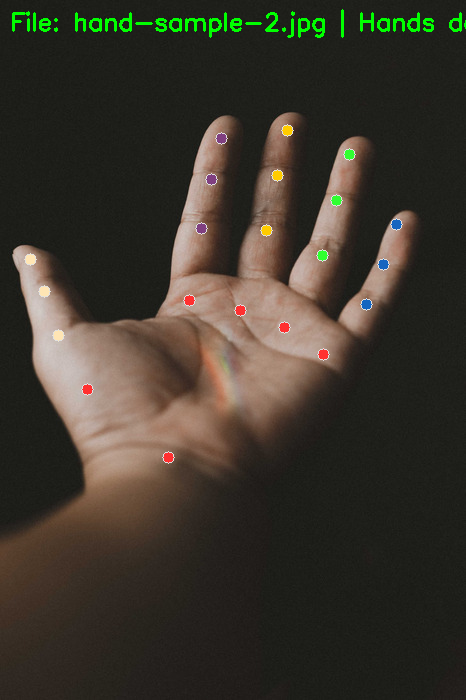

Processing: hand-sample-4.jpg - Saved landmarks to /content/hand_landmarks/hand-sample-4.json


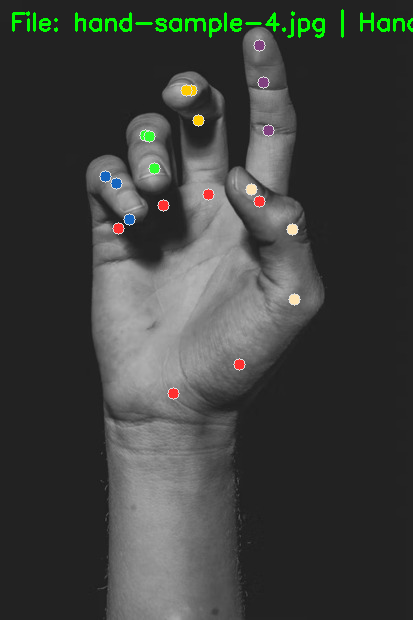

Processing: hand-sample-3.jpg - Saved landmarks to /content/hand_landmarks/hand-sample-3.json


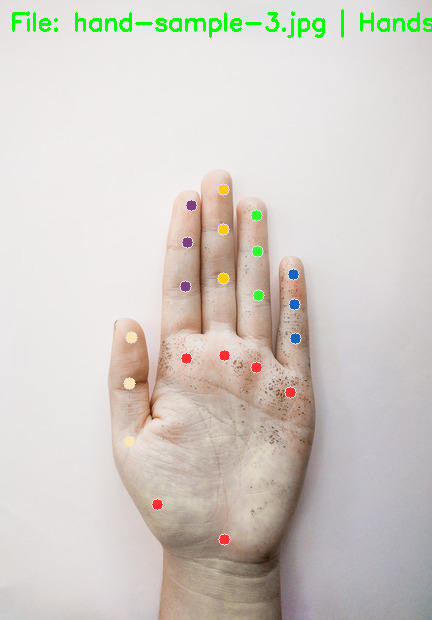

In [59]:
import cv2
import mediapipe as mp
import os
import json
import numpy as np
from google.colab.patches import cv2_imshow

# Initialize MediaPipe solutions
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# Create folder for landmark data if it doesn't exist
output_folder = '/content/hand_landmarks/'
os.makedirs(output_folder, exist_ok=True)

# Helper function to convert landmark to dictionary
def landmark_to_dict(landmark):
    return {
        'x': landmark.x,
        'y': landmark.y,
        'z': landmark.z
    }

# Set up Hands for static images
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:

    # Set folder path
    folder_path = '/content/sample'  # Change this to your folder path

    # Get all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'))]

    # Process each image in the folder
    for image_file in image_files:
        # Construct full file path
        image_path = os.path.join(folder_path, image_file)

        # Read image file
        image = cv2.imread(image_path)

        # Skip if image couldn't be loaded
        if image is None:
            print(f"Could not read image: {image_path}")
            continue

        # Convert to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Process the image
        results = hands.process(image_rgb)

        # Prepare landmarks data for this image
        landmarks_data = {
            'image_name': image_file,
            'hands': []
        }

        # Draw hand landmarks if detected
        if results.multi_hand_landmarks:
            for hand_idx, landmarks in enumerate(results.multi_hand_landmarks):
                # Get hand type (Left/Right) if available
                hand_type = "Unknown"
                if results.multi_handedness and hand_idx < len(results.multi_handedness):
                    hand_type = results.multi_handedness[hand_idx].classification[0].label

                # Draw landmarks on image
                mp_drawing.draw_landmarks(
                    image,
                    landmarks,
                    landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style()
                )

                # Store landmarks for this hand
                hand_data = {
                    'hand_type': hand_type,
                    'landmarks': []
                }

                for i, landmark in enumerate(landmarks.landmark):
                    hand_data['landmarks'].append({
                        'id': i,
                        'position': landmark_to_dict(landmark)
                    })

                landmarks_data['hands'].append(hand_data)

        # Save landmarks data to JSON file
        base_name = os.path.splitext(image_file)[0]
        json_path = os.path.join(output_folder, f"{base_name}.json")
        with open(json_path, 'w') as f:
            json.dump(landmarks_data, f, indent=2)

        # Add filename as caption
        caption = f"File: {image_file} | Hands detected: {len(landmarks_data['hands'])}"
        cv2.putText(image, caption, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

        # Display the output
        print(f"Processing: {image_file} - Saved landmarks to {json_path}")
        cv2_imshow(image)